In [40]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
from collections import Counter

In [67]:

df = pd.read_csv("C://Users//sophi//OneDrive - University of Leeds//Year 4//Sophie Blanch//code//pm6_energy//data//All_best_binding_energies_data.csv")

print(df)
count = (df['best binding energy'] < 0).sum()
total_values = df['best binding energy'].size
prop_less_than_zero = count / total_values
print(f"Percentage of favourable binding energies: {prop_less_than_zero * 100}%")


       Code  best binding energy  bond number of best binding energy
0      LCCW           -13.128988                                 0.0
1      LKPR           -15.659329                                 3.0
2      GGTE           -15.233481                                 4.0
3      SDRK            -1.125878                                 0.0
4      ADYC           -39.687037                                 3.0
...     ...                  ...                                 ...
39715  AWDC            -9.331464                                 0.0
39716  VIFK           -11.891294                                 NaN
39717  AKHV           -13.692631                                 3.0
39718  TDWE           -13.150159                                 4.0
39719  MHPR           -22.386707                                 2.0

[39720 rows x 3 columns]
Percentage of favourable binding energies: 87.25830815709969%


In [68]:
# Define min and max values
min_value = df['best binding energy'].min()
max_value = df['best binding energy'].max()
print(min_value)

-118.1799477


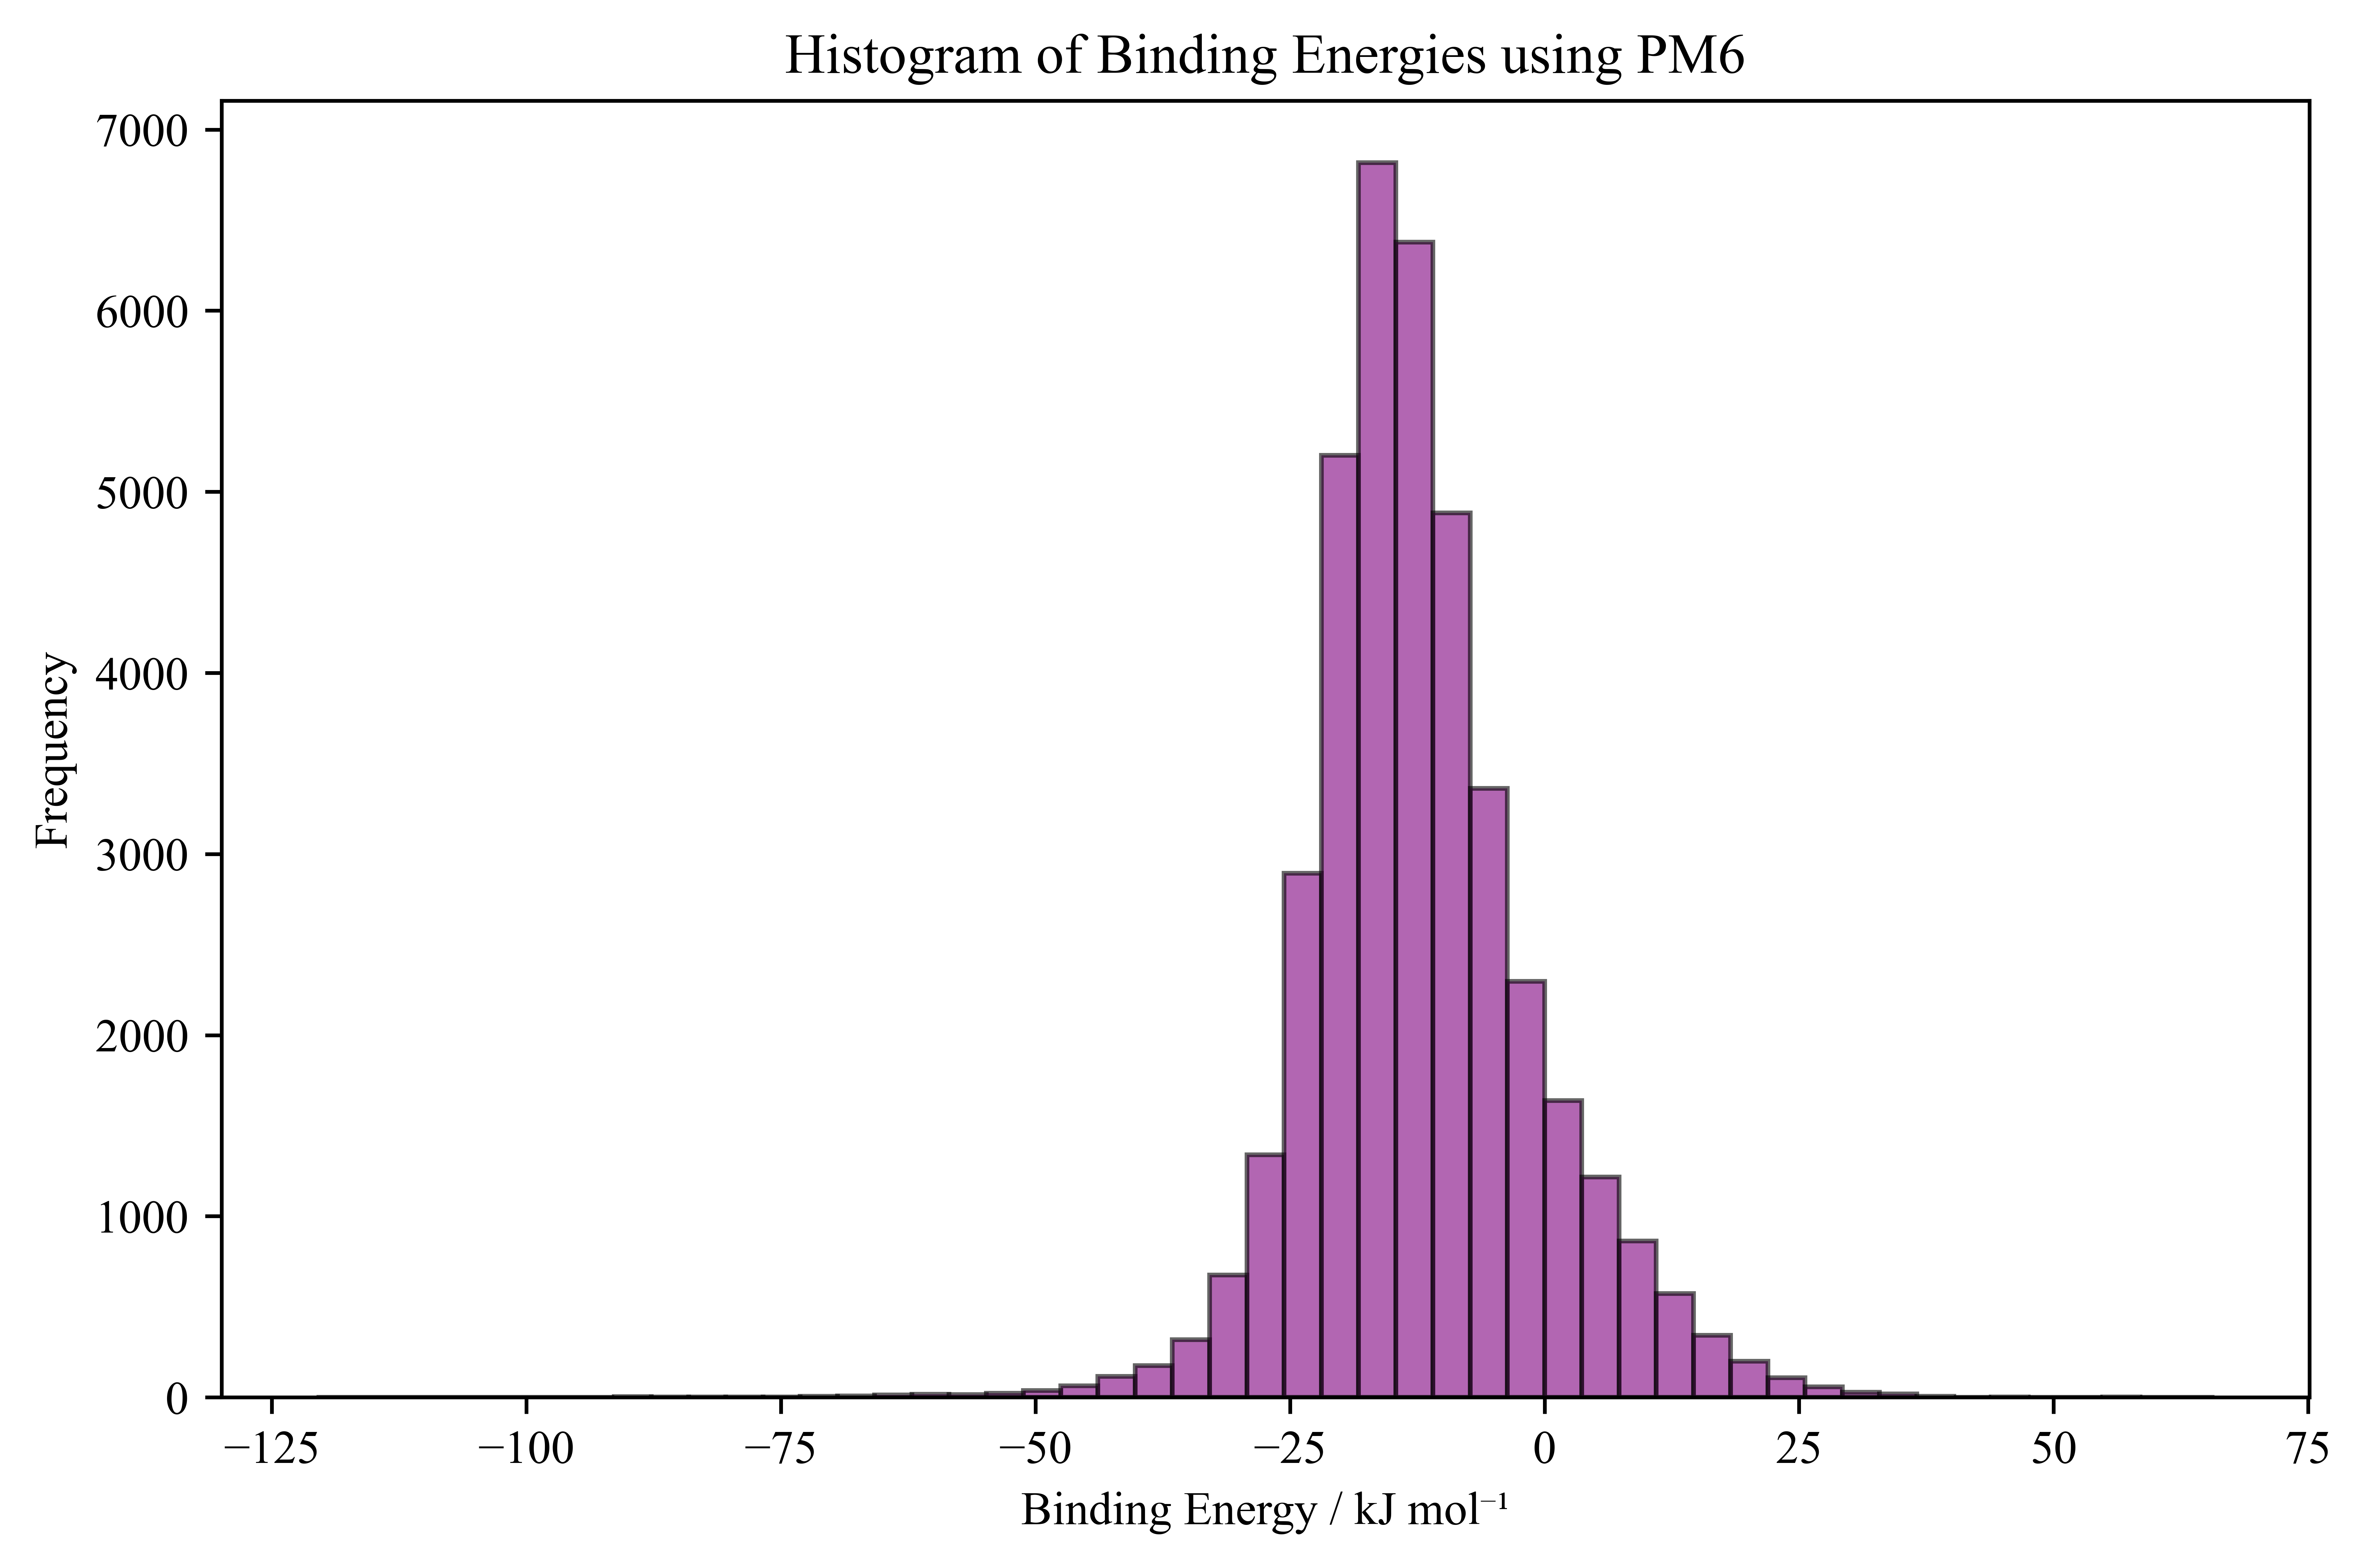

In [43]:
# Define the number of bins
num_bins = 50

# Calculate bin width
bin_width = (max_value - min_value) / num_bins

# Generate bin edges ensuring 0 is a boundary
start_bin = min_value - (min_value % bin_width)
bins = np.arange(start_bin, max_value + bin_width, bin_width)

# Ensure 0 is a bin edge
if 0 not in bins:
    bins = np.append(bins, 0)
    bins = np.sort(bins)

# Plot histogram
plt.figure(figsize=(8, 5), dpi=1000)
plt.hist(df['best binding energy'], bins=bins, color='purple', alpha=0.6, edgecolor='black')
plt.xlabel('Binding Energy / kJ mol⁻¹')
plt.ylabel('Frequency')
plt.title('Histogram of Binding Energies using PM6')
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/pm6_overall_binding_energy_histogram.png", dpi=1000, bbox_inches='tight')


# Show the plot
plt.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_4632\2322717278.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')


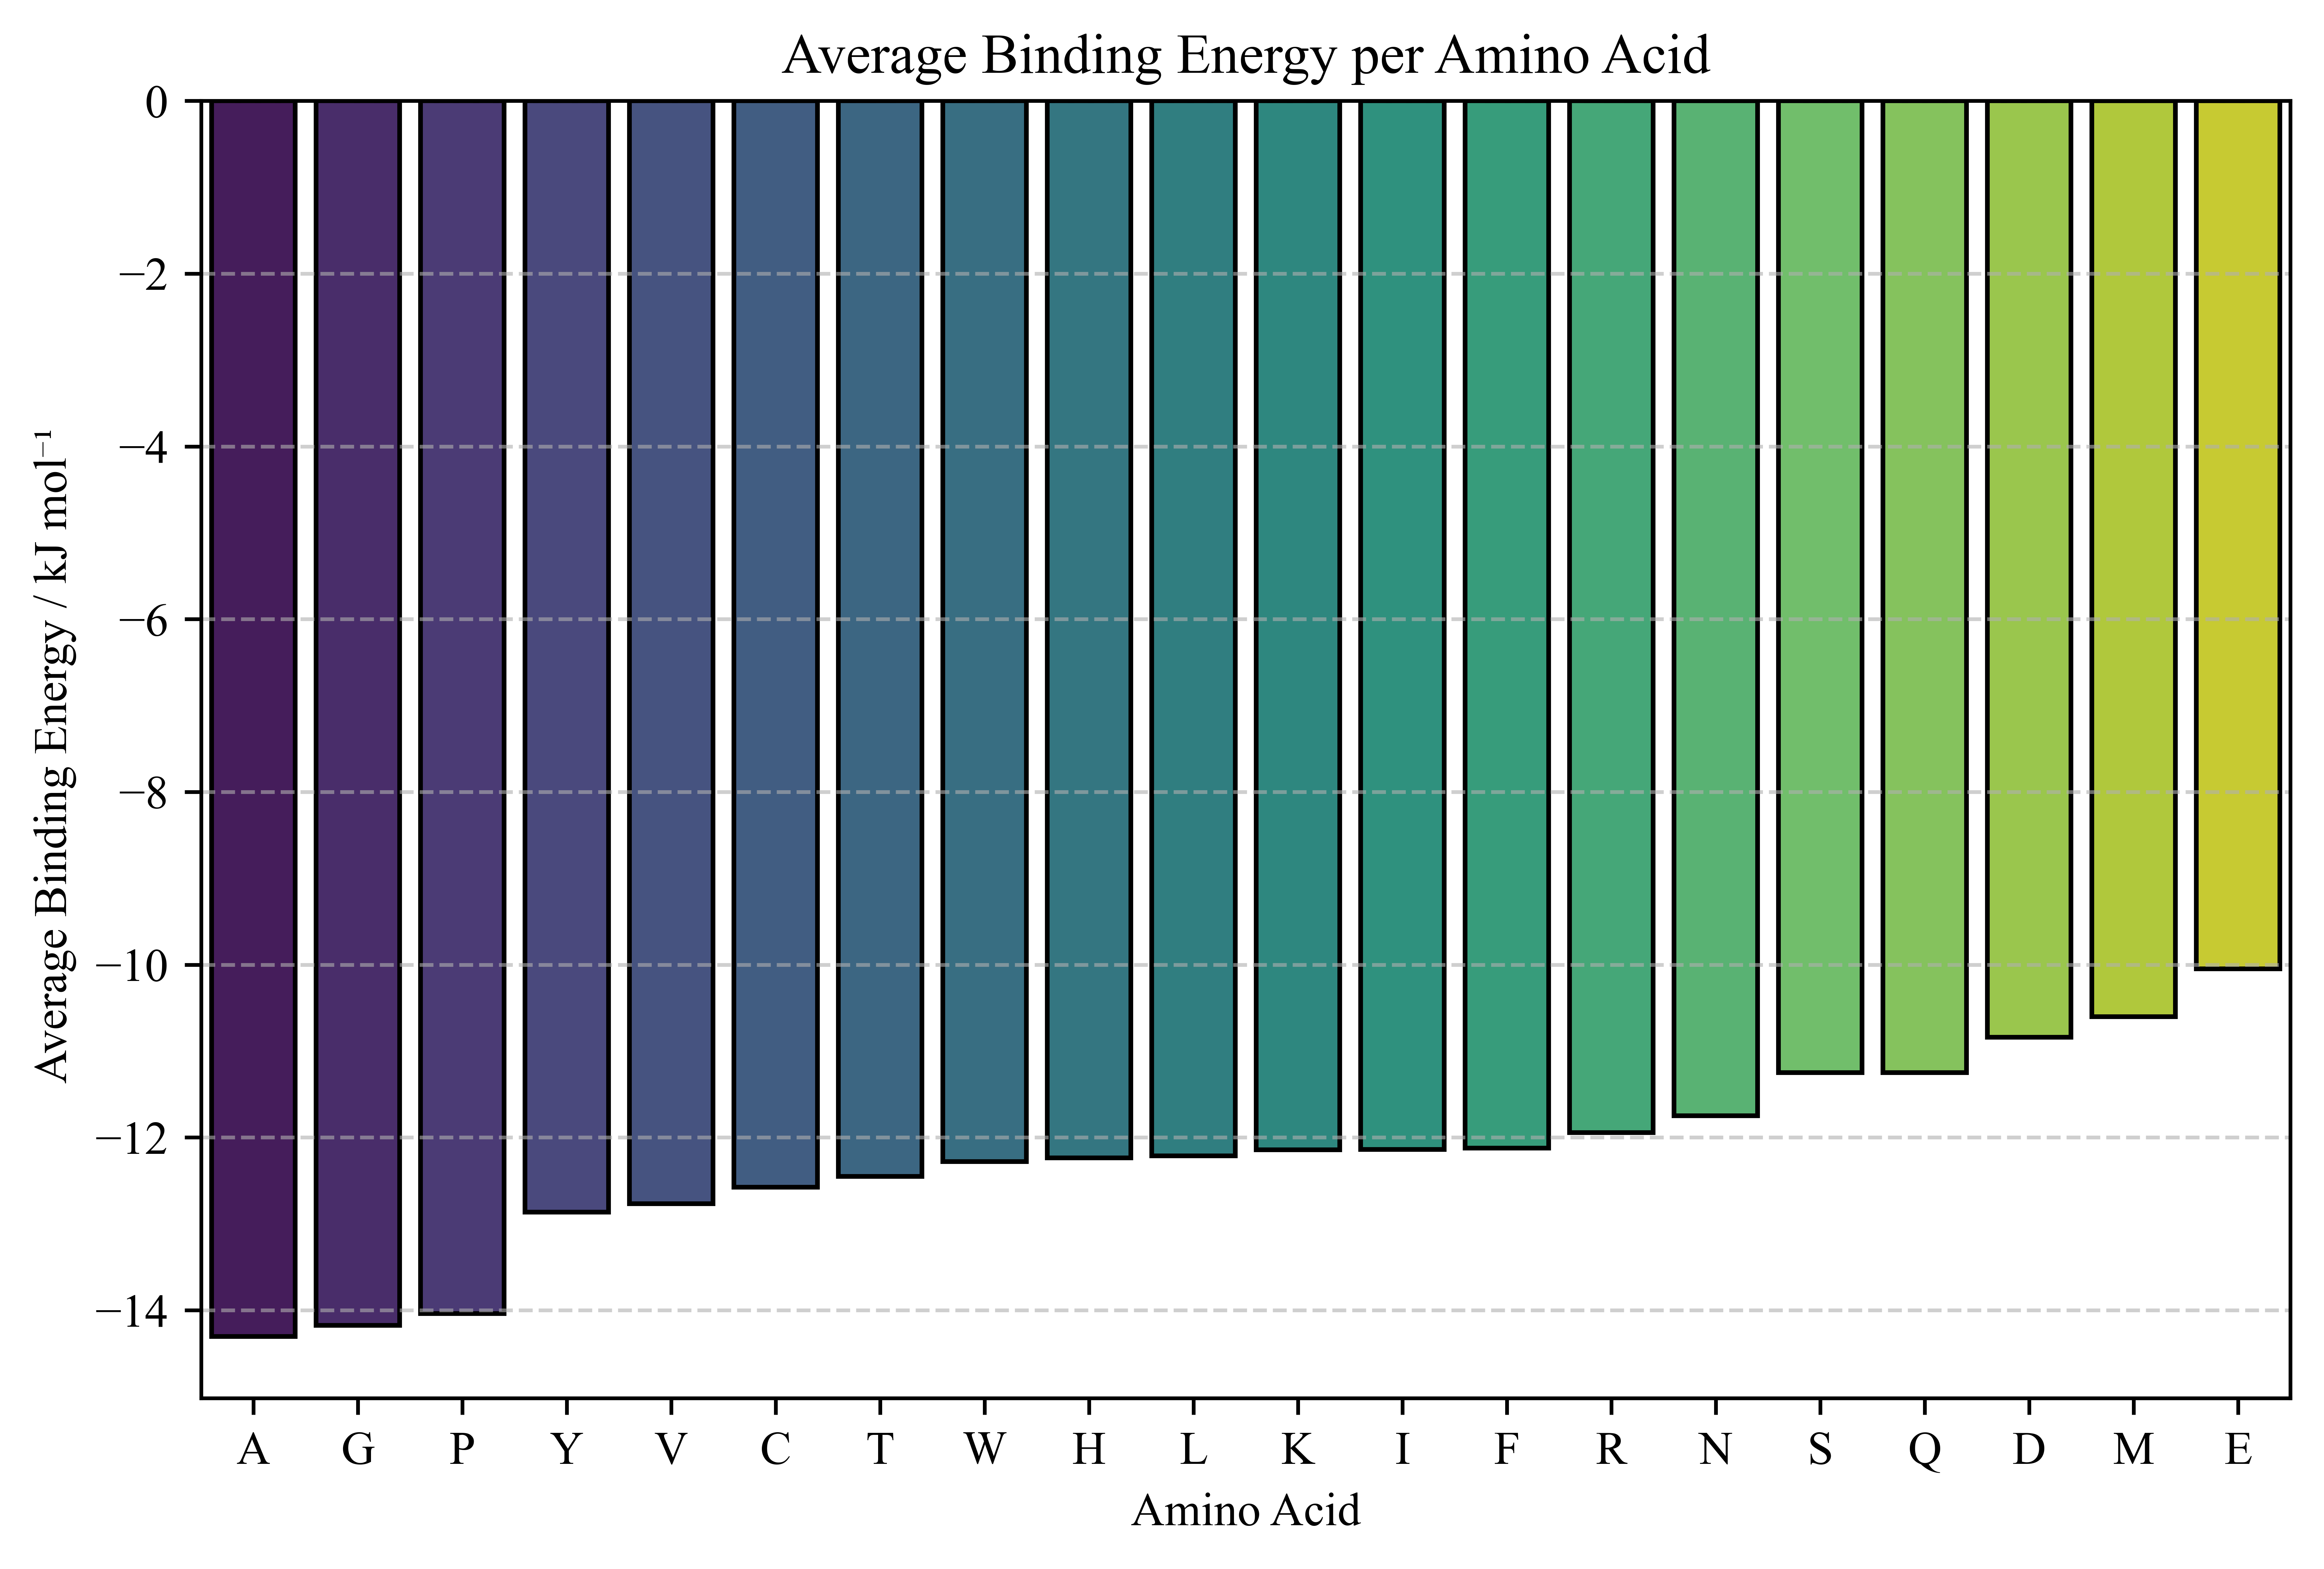

In [44]:
# Dictionary to store summed energies and counts for each amino acid
amino_energy_sum = defaultdict(float)
amino_count = defaultdict(int)

# Process each row in the DataFrame
for _, row in df.iterrows():
    peptide = row['Code']
    energy = row['best binding energy']

    # Distribute energy equally among amino acids in the peptide
    for amino in peptide:
        amino_energy_sum[amino] += energy  # Sum energies for each amino acid
        amino_count[amino] += 1  # Count occurrences of each amino acid

# Compute average energy per amino acid
amino_avg_energy = {aa: amino_energy_sum[aa] / amino_count[aa] for aa in amino_energy_sum}

# Convert to DataFrame for plotting
avg_energy_df = pd.DataFrame(amino_avg_energy.items(), columns=['Amino Acid', 'Average Binding Energy'])
avg_energy_df = avg_energy_df.sort_values(by='Average Binding Energy')  # Sort

# Plot the bar chart
plt.figure(figsize=(8, 5), dpi=1000)
sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')

plt.xlabel("Amino Acid")
plt.ylabel("Average Binding Energy / kJ mol⁻¹ ")
plt.title("Average Binding Energy per Amino Acid")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/overall_average_binding_energy_per_amino_acid_histogram.png", dpi=1000, bbox_inches='tight')

plt.show()

In [70]:
print(df)
row = df[df['best binding energy'] == -118.1799477]
print(f"\n\n{row}")


       Code  best binding energy  bond number of best binding energy
0      LCCW           -13.128988                                 0.0
1      LKPR           -15.659329                                 3.0
2      GGTE           -15.233481                                 4.0
3      SDRK            -1.125878                                 0.0
4      ADYC           -39.687037                                 3.0
...     ...                  ...                                 ...
39715  AWDC            -9.331464                                 0.0
39716  VIFK           -11.891294                                 NaN
39717  AKHV           -13.692631                                 3.0
39718  TDWE           -13.150159                                 4.0
39719  MHPR           -22.386707                                 2.0

[39720 rows x 3 columns]


       Code  best binding energy  bond number of best binding energy
23612  DEMY          -118.179948                                 4.0


# Assuming only tetrahedral structures


In [71]:
# Drop NaN
df = df.dropna()
df['bond number of best binding energy'] = df['bond number of best binding energy'].astype(int)

# Find four co-ordinate complexes
df_filtered = df[df['bond number of best binding energy'] == 4]

# Display the filtered dataframe
print(df_filtered)

       Code  best binding energy  bond number of best binding energy
2      GGTE           -15.233481                                   4
5      AHYG           -11.369507                                   4
6      FPKM           -25.599383                                   4
9      SFMV            10.922878                                   4
11     TNND           -20.789206                                   4
...     ...                  ...                                 ...
39695  VTHY           -17.272278                                   4
39698  LDRN           -14.207405                                   4
39701  GSNE           -14.802697                                   4
39712  EQRP           -18.718862                                   4
39718  TDWE           -13.150159                                   4

[18307 rows x 3 columns]


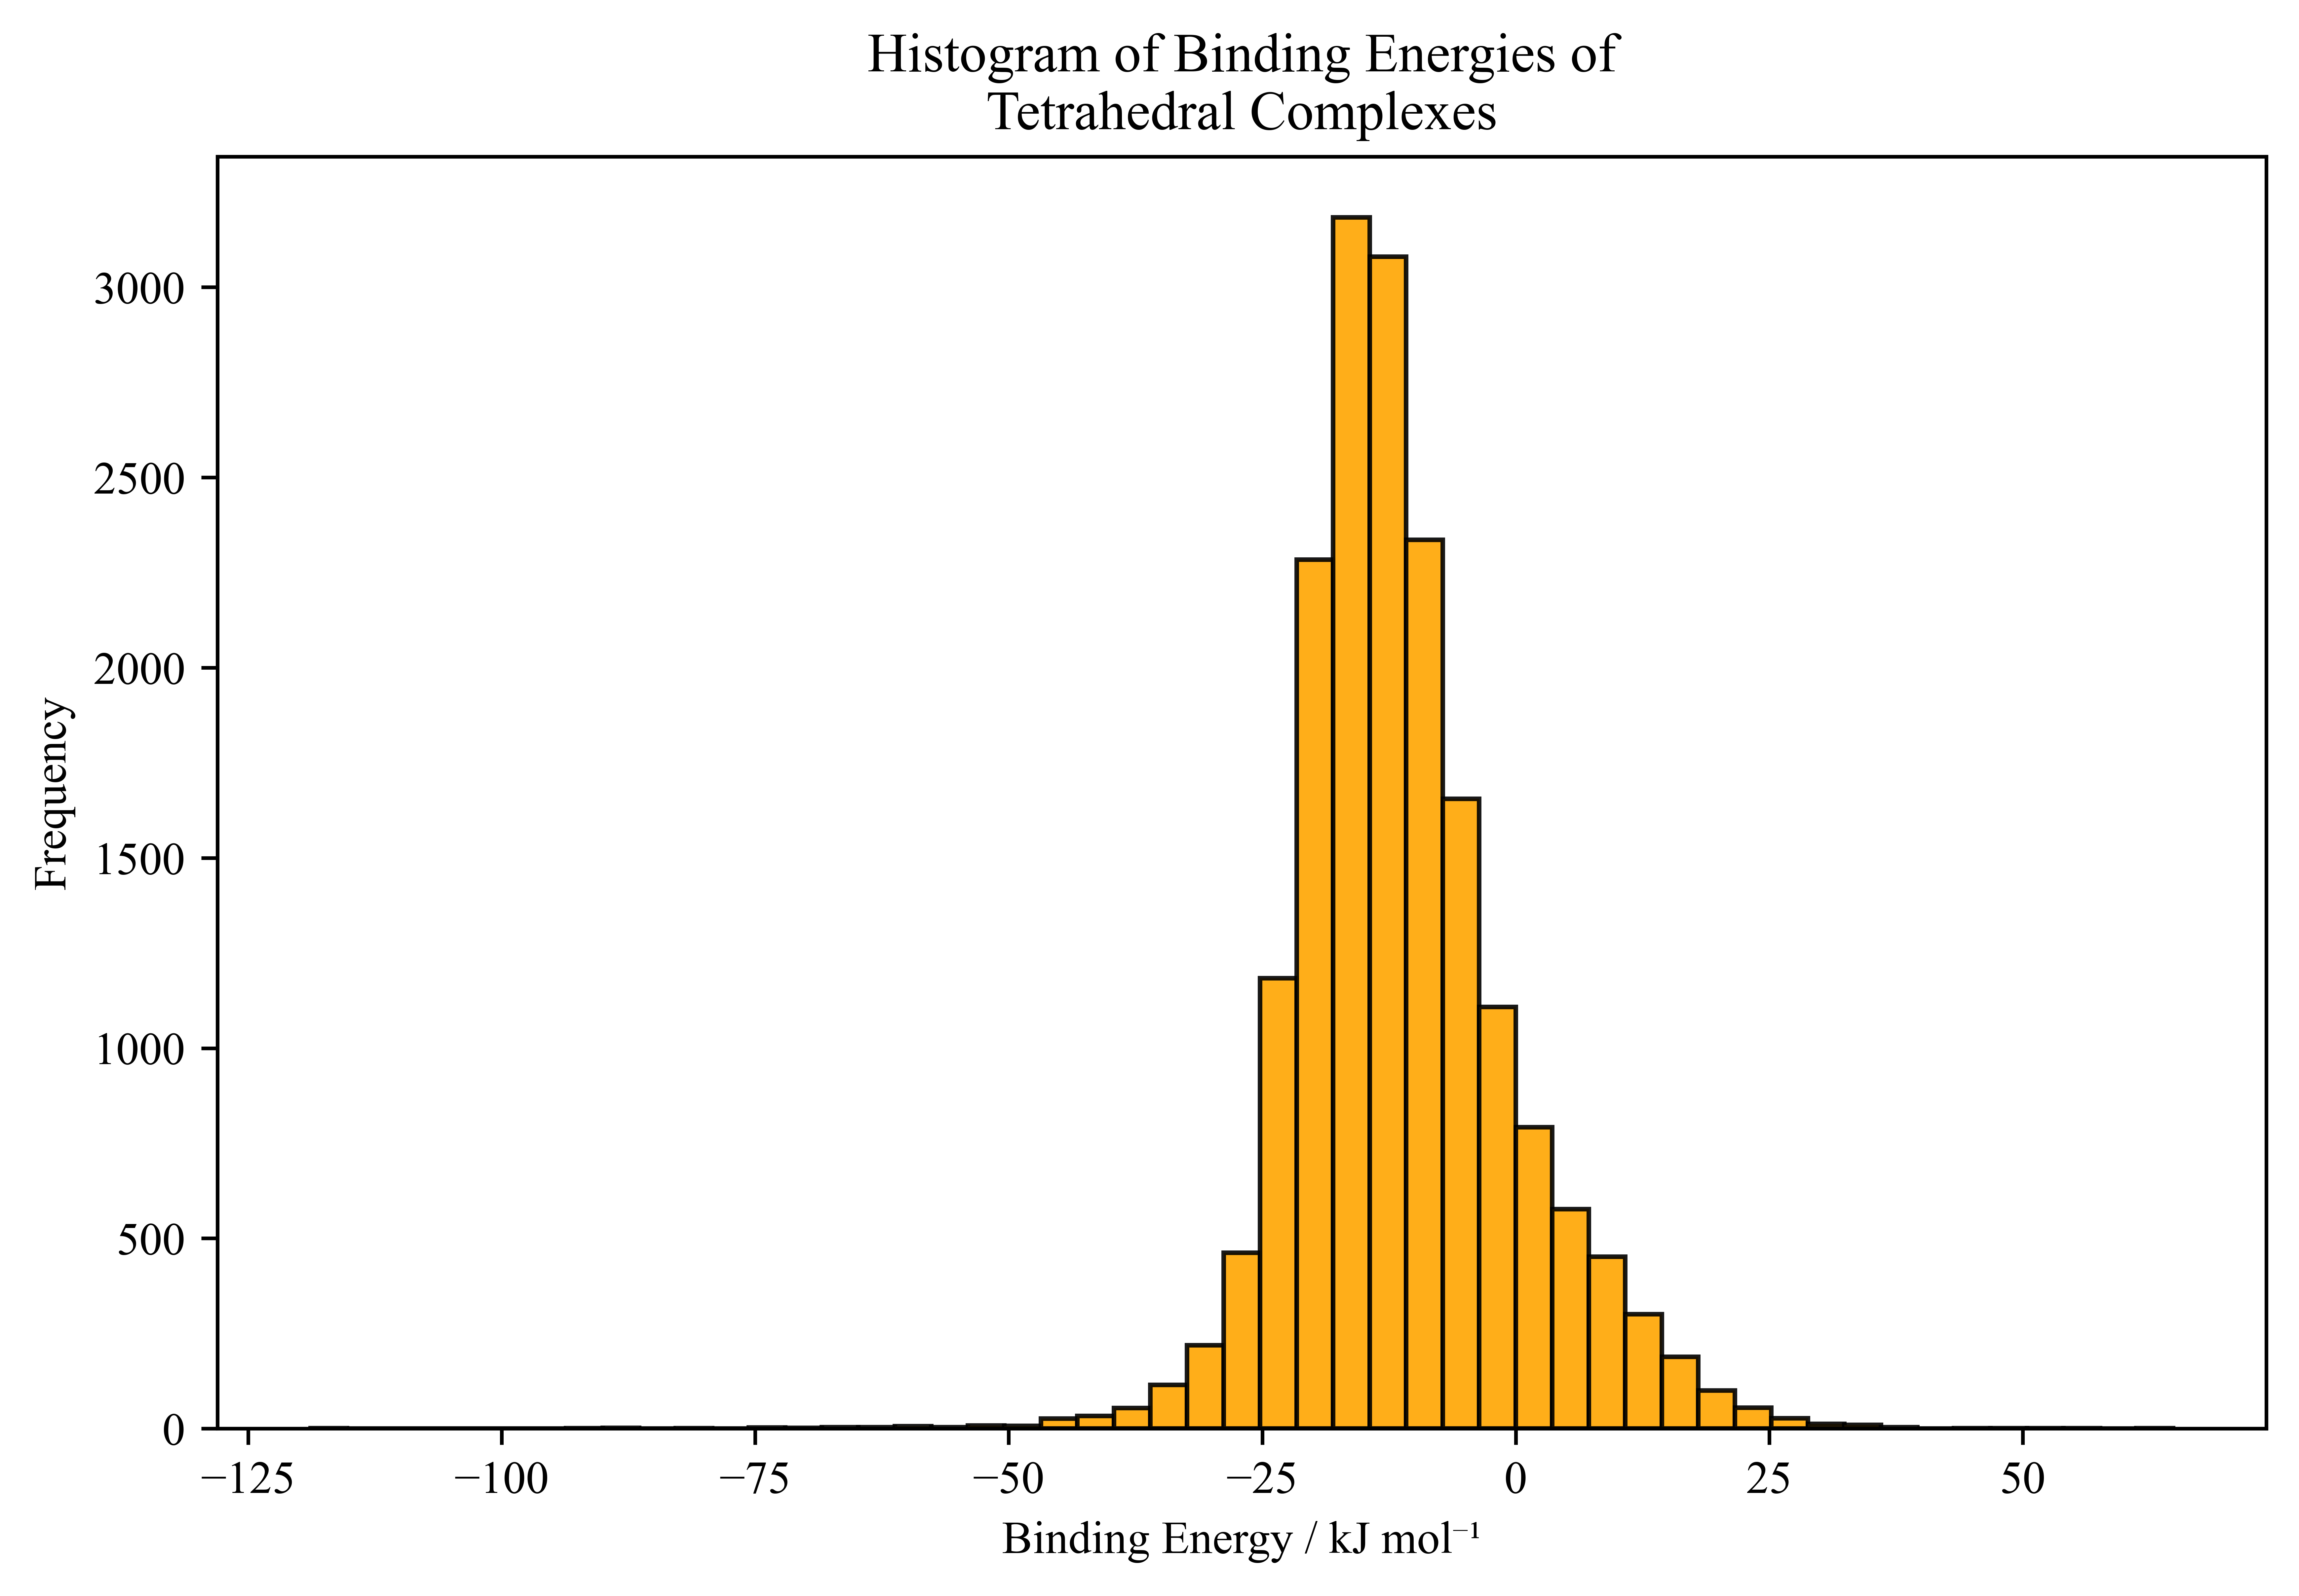

In [47]:
min_value = df_filtered['best binding energy'].min()
max_value = df_filtered['best binding energy'].max()

# Define the number of bins
num_bins = 50

# Calculate bin width
bin_width = (max_value - min_value) / num_bins

# Generate bin edges ensuring 0 is a boundary
start_bin = min_value - (min_value % bin_width)
bins = np.arange(start_bin, max_value + bin_width, bin_width)

# Ensure 0 is a bin edge
if 0 not in bins:
    bins = np.append(bins, 0)
    bins = np.sort(bins)

# Plot histogram
plt.figure(figsize=(8, 5), dpi=1000)
plt.hist(df_filtered['best binding energy'], bins=bins, color='orange', alpha=0.9, edgecolor='black')
plt.xlabel('Binding Energy / kJ mol⁻¹')
plt.ylabel('Frequency')
plt.title('Histogram of Binding Energies of\nTetrahedral Complexes')
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/tetrahedral_binding_energies_histogram.png", dpi=1000, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_4632\1874878661.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')


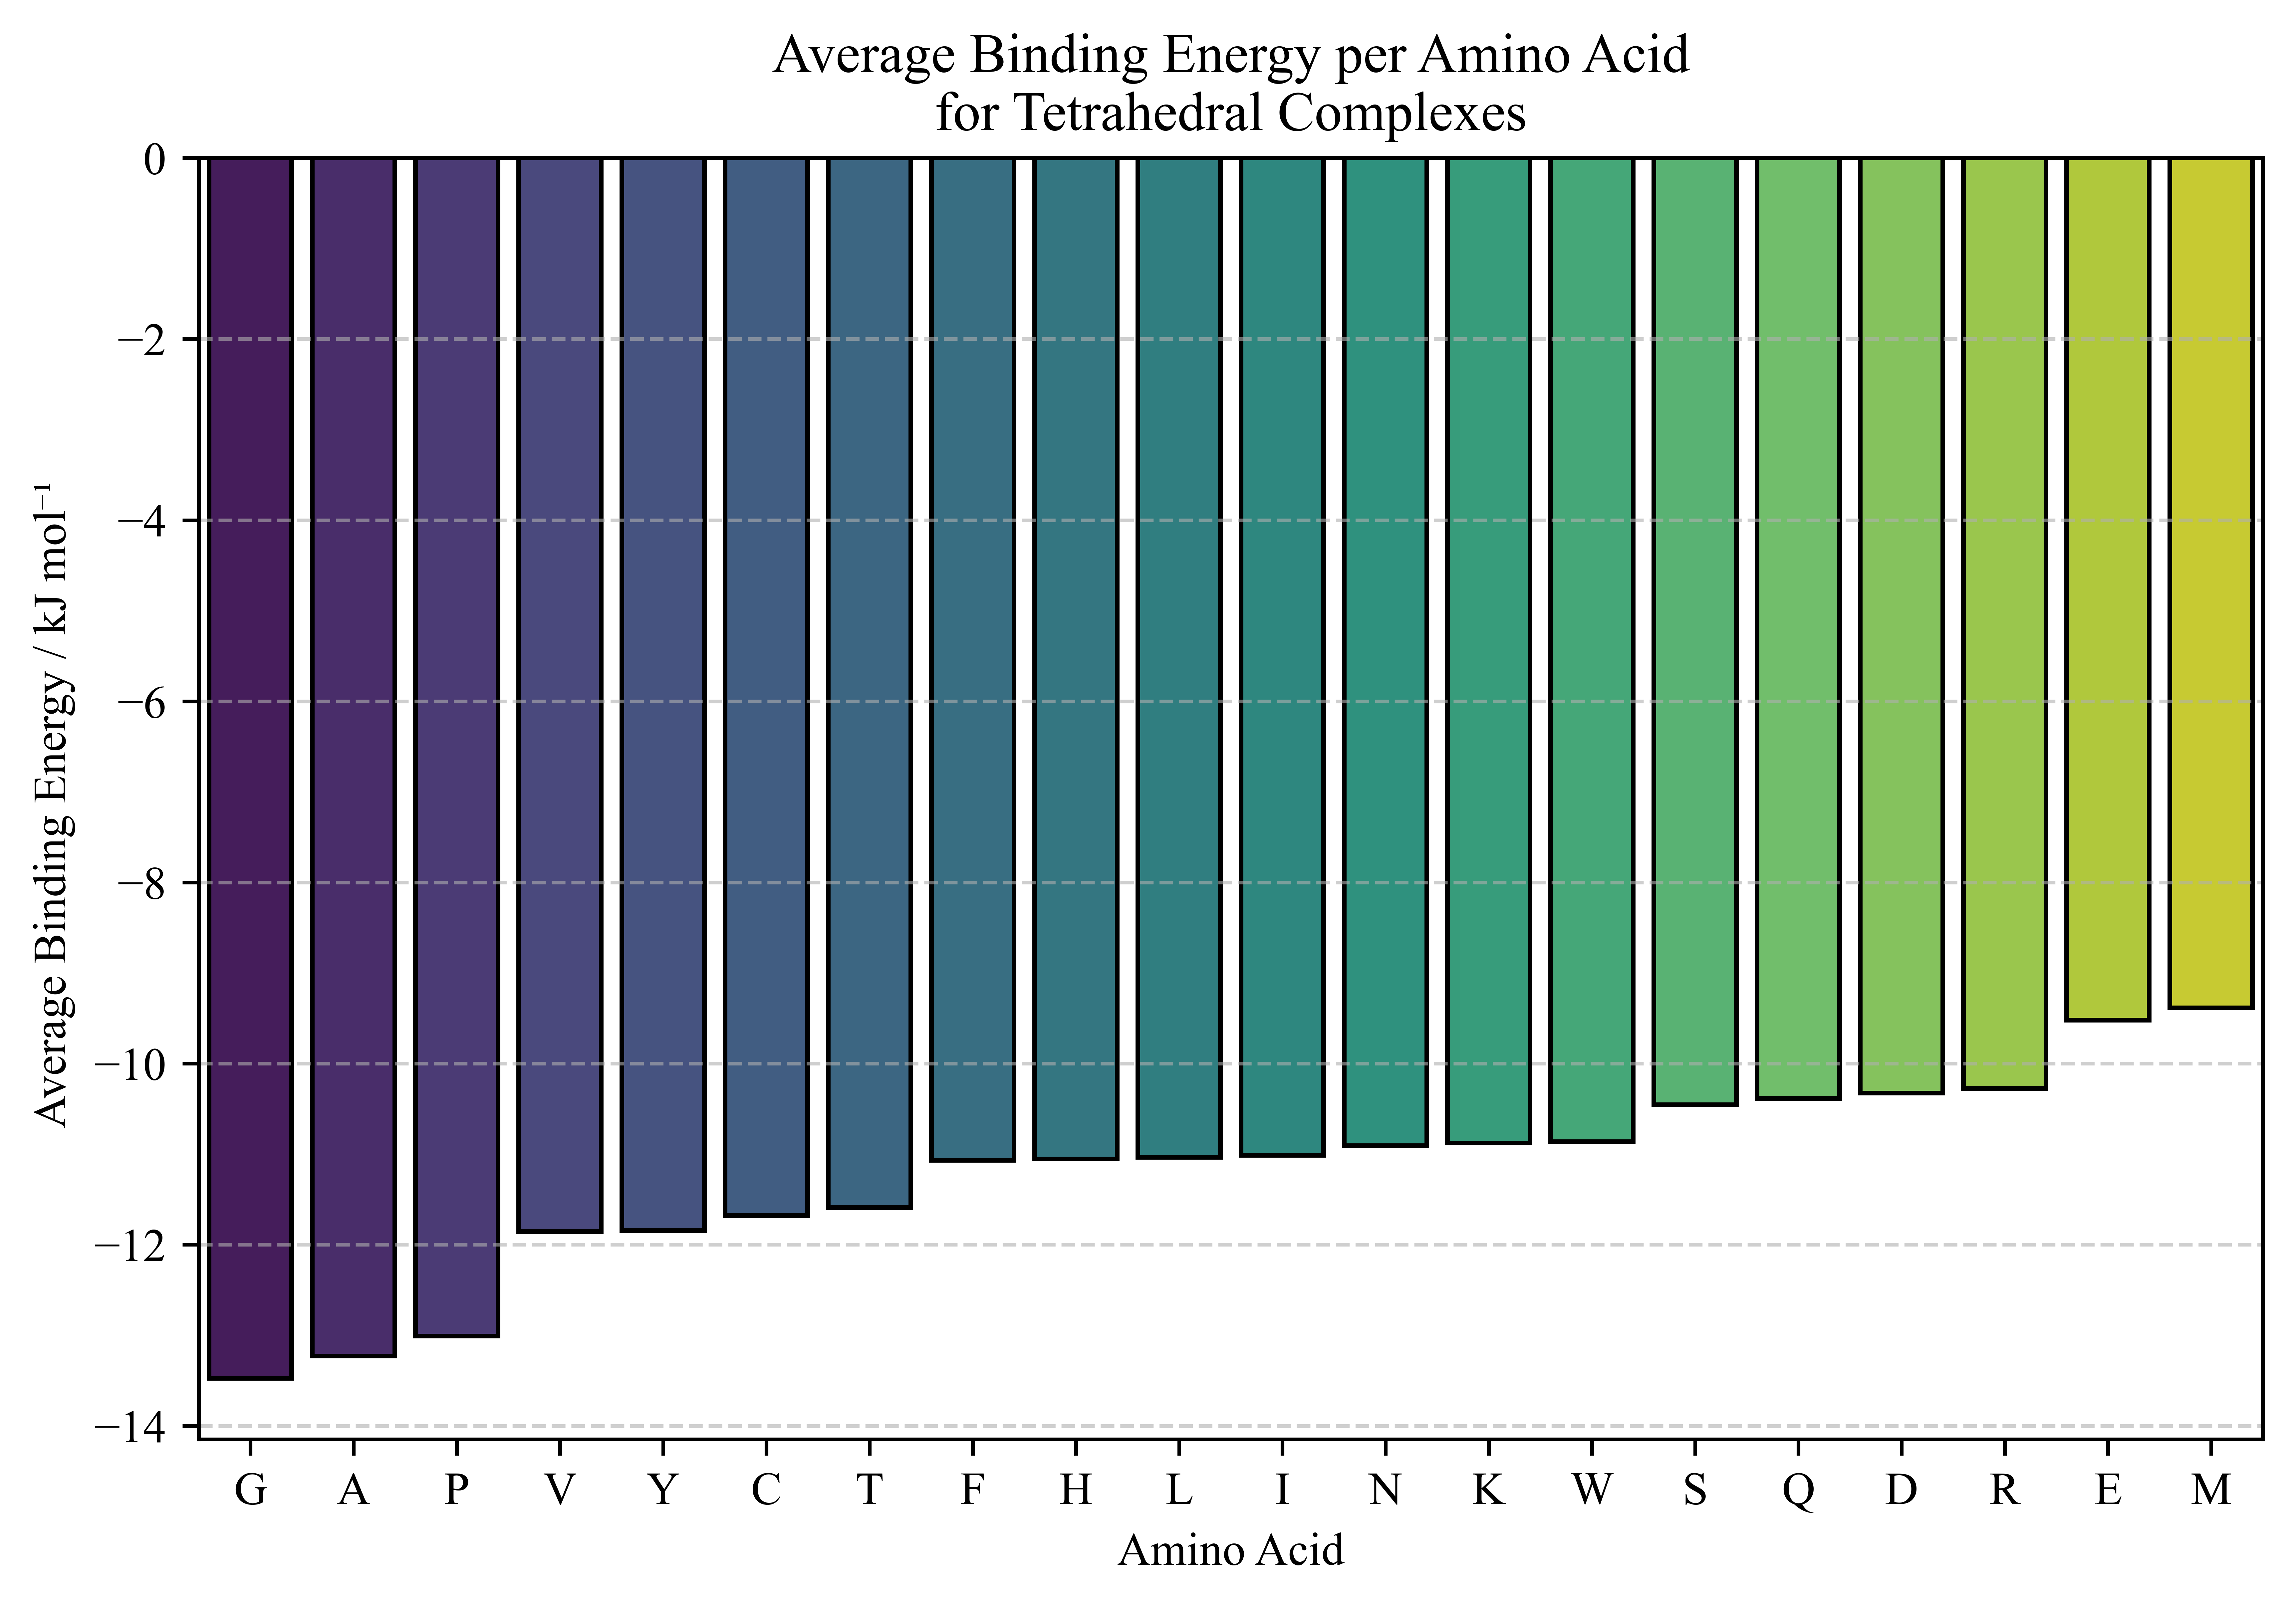

In [48]:
# Dictionary to store summed energies and counts for each amino acid
amino_energy_sum = defaultdict(float)
amino_count = defaultdict(int)

# Process each row in the DataFrame
for _, row in df_filtered.iterrows():
    peptide = row['Code'] 
    energy = row['best binding energy'] 

    # Distribute energy equally among amino acids in the peptide
    for amino in peptide:
        amino_energy_sum[amino] += energy
        amino_count[amino] += 1  

# Compute average energy per amino acid
amino_avg_energy = {aa: amino_energy_sum[aa] / amino_count[aa] for aa in amino_energy_sum}

# Convert to DataFrame for plotting
avg_energy_df = pd.DataFrame(amino_avg_energy.items(), columns=['Amino Acid', 'Average Binding Energy'])
avg_energy_df = avg_energy_df.sort_values(by='Average Binding Energy')  # Sort
# Plot the bar chart
plt.figure(figsize=(8, 5), dpi=1000)
sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')

plt.xlabel("Amino Acid")
plt.ylabel("Average Binding Energy / kJ mol⁻¹ ")
plt.title("Average Binding Energy per Amino Acid\nfor Tetrahedral Complexes")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/tetrahedral_average_binding_energy_per_amino_acid_histogram.png", dpi=1000, bbox_inches='tight')

plt.show()

In [49]:
# Find the orientation number for the best 5 complexes to find their geometries
df_best = df_filtered[df_filtered['best binding energy'] < -79]

df_best['orientation number'] = [2, 2, 1, 3, 1]
df_best = df_best.sort_values(by='best binding energy')
print(df_best)

       Code  best binding energy  bond number of best binding energy  \
23612  DEMY          -118.179948                                   4   
14768  IEHE           -91.091083                                   4   
10243  DEWH           -88.180233                                   4   
29775  IEWD           -87.142676                                   4   
6421   EERQ           -81.928709                                   4   

       Binding Constants  orientation number  
23612       5.197629e+20                   3  
14768       9.276594e+15                   1  
10243       2.865131e+15                   2  
29775       1.884824e+15                   1  
6421        2.297802e+14                   2  


C:\Users\sophi\AppData\Local\Temp\ipykernel_4632\1131178823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['orientation number'] = [2, 2, 1, 3, 1]


In [72]:
threshold = df_filtered['best binding energy'].quantile(0.1)
lowest_10_percent = df_filtered[df_filtered['best binding energy'] <= threshold]

print(lowest_10_percent)

       Code  best binding energy  bond number of best binding energy
6      FPKM           -25.599383                                   4
92     GDCQ           -22.409468                                   4
108    LRPI           -31.048792                                   4
127    ICIN           -24.258553                                   4
159    LYWQ           -22.617856                                   4
...     ...                  ...                                 ...
39637  LQYY           -24.595583                                   4
39647  DENC           -24.754834                                   4
39651  YCKW           -25.113704                                   4
39671  FYRY           -33.225141                                   4
39679  LYIR           -26.274664                                   4

[1831 rows x 3 columns]


C:\Users\sophi\AppData\Local\Temp\ipykernel_4632\888454571.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')


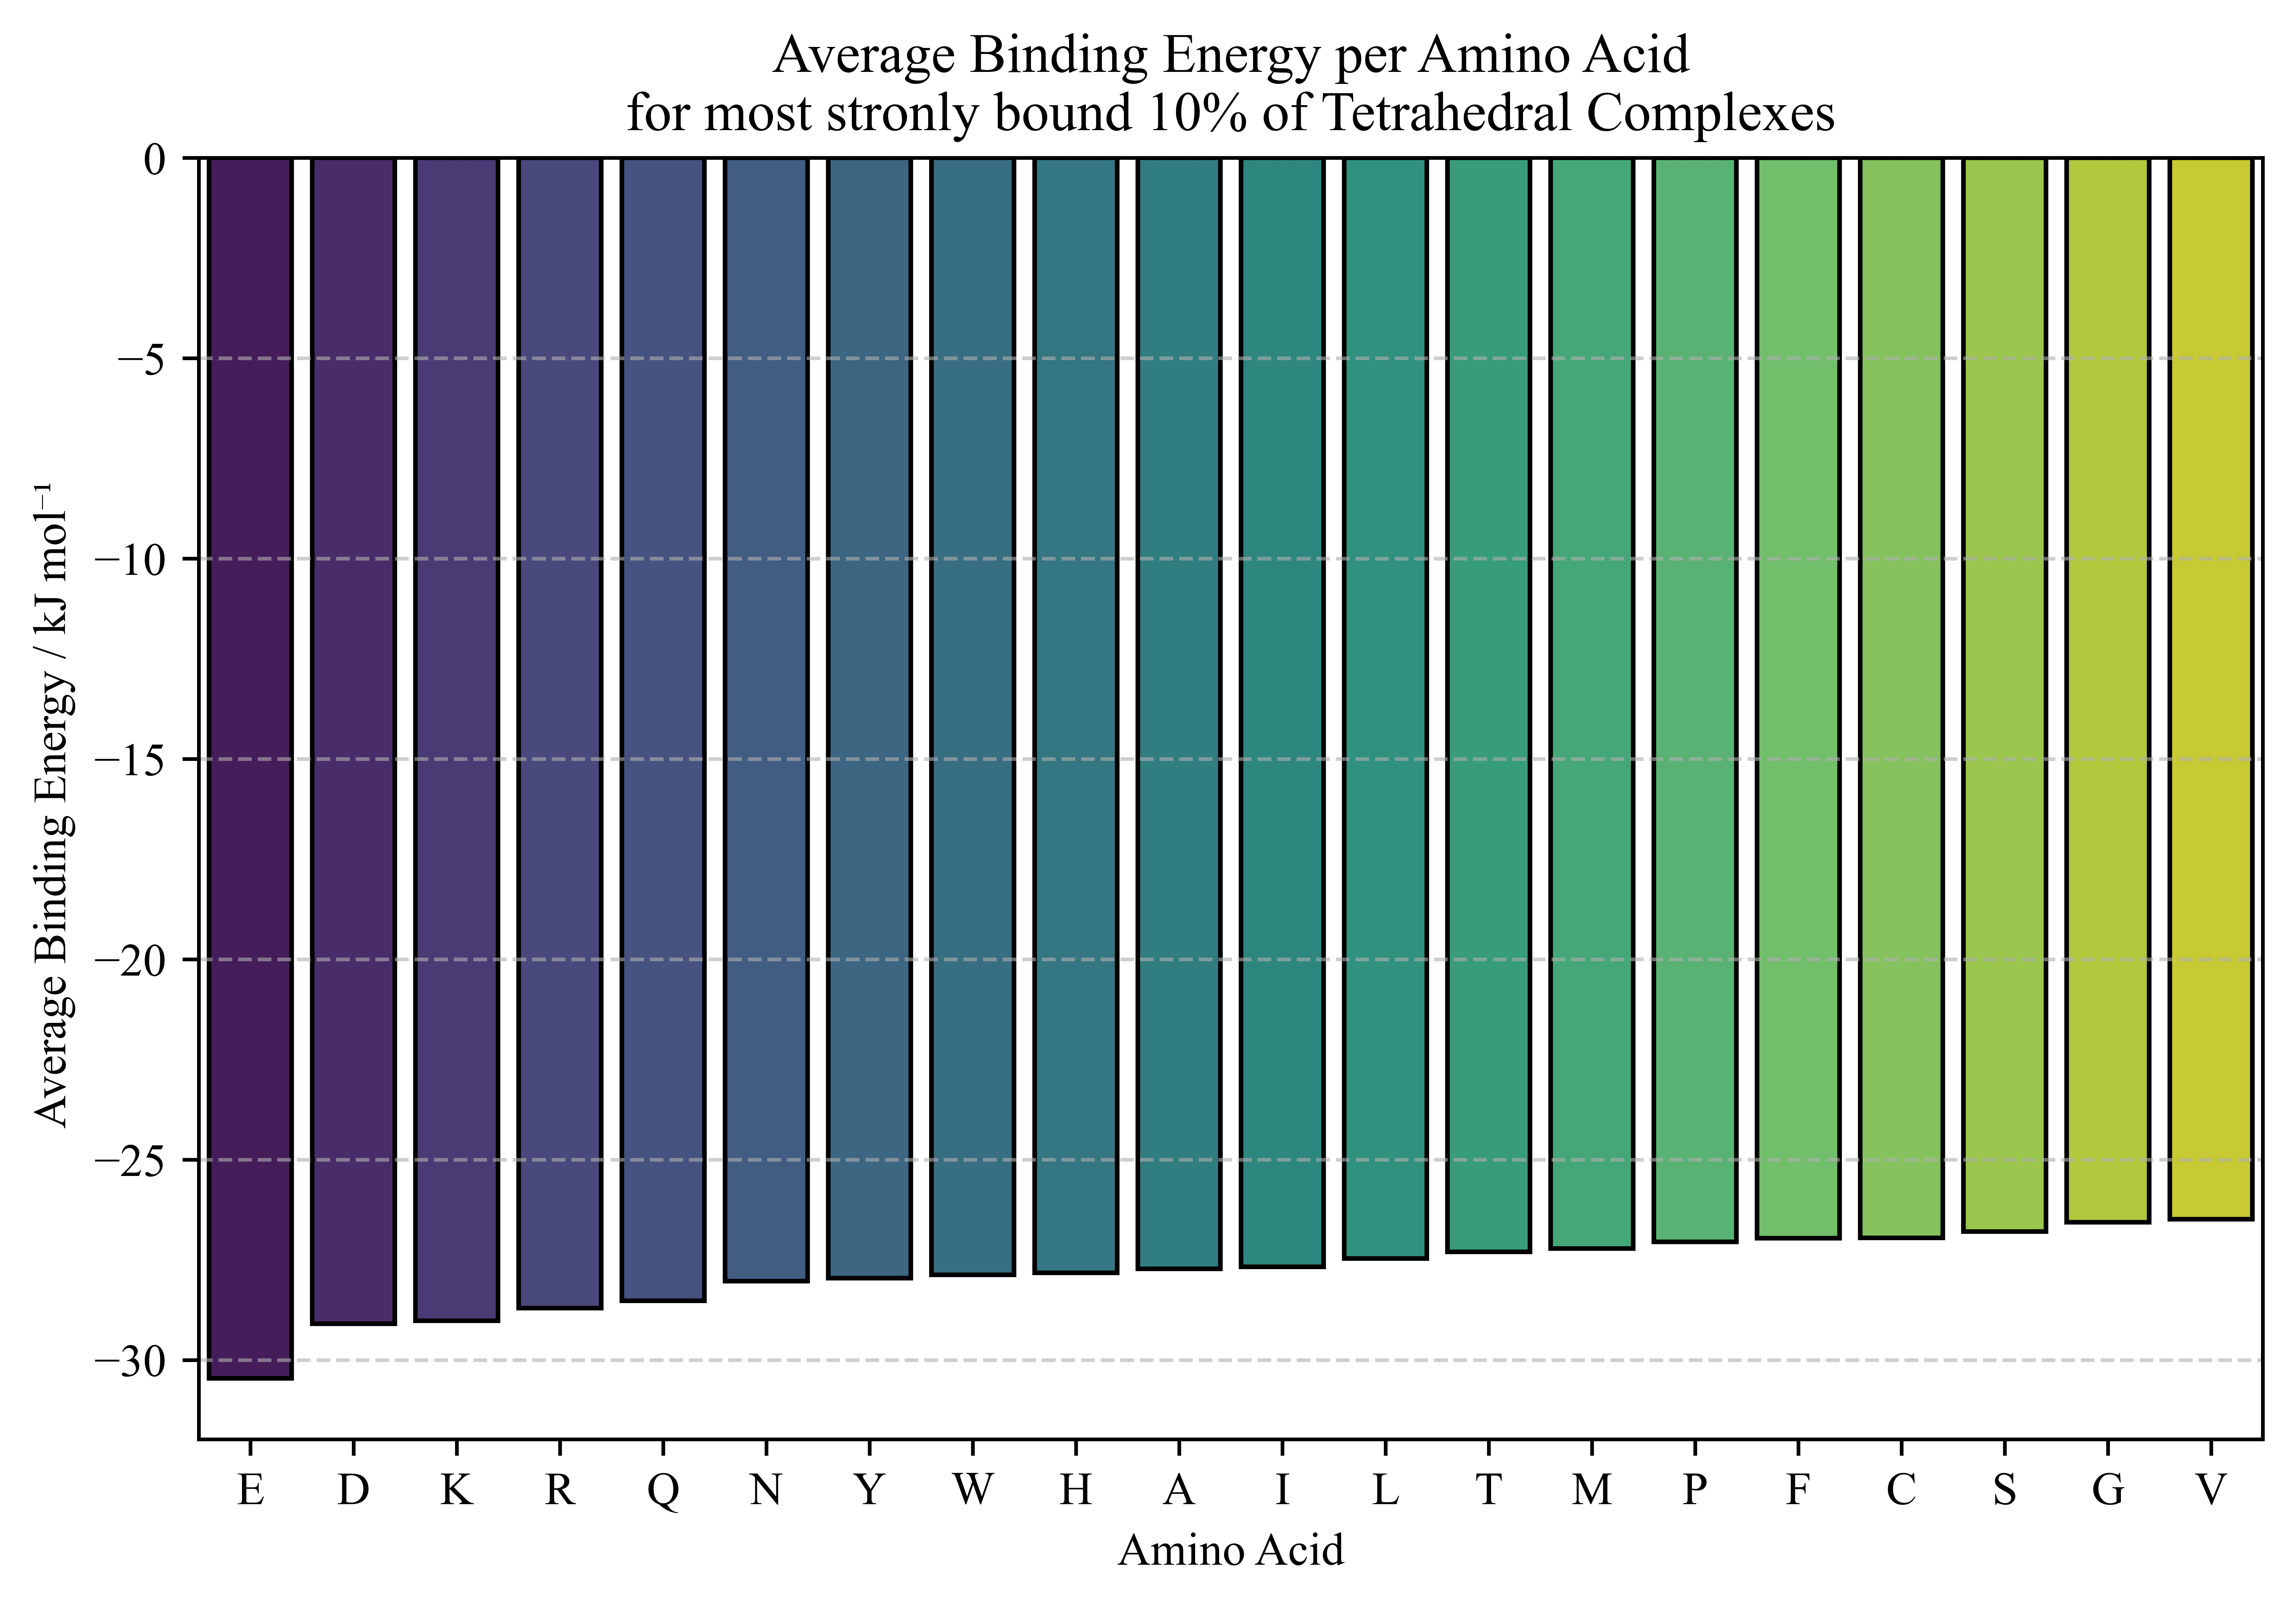

In [51]:
# Dictionary to store summed energies and counts for each amino acid
amino_energy_sum = defaultdict(float)
amino_count = defaultdict(int)

# Process each row in the DataFrame
for _, row in lowest_10_percent.iterrows():
    peptide = row['Code']    
    energy = row['best binding energy']   

    # Distribute energy equally among amino acids in the peptide
    for amino in peptide:
        amino_energy_sum[amino] += energy      
        amino_count[amino] += 1     

# Compute average energy per amino acid
amino_avg_energy = {aa: amino_energy_sum[aa] / amino_count[aa] for aa in amino_energy_sum}

# Convert to DataFrame for plotting
avg_energy_df = pd.DataFrame(amino_avg_energy.items(), columns=['Amino Acid', 'Average Binding Energy'])
avg_energy_df = avg_energy_df.sort_values(by='Average Binding Energy')  # Sort 

# Plot the bar chart
plt.figure(figsize=(8, 5), dpi=1000)
sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')

plt.xlabel("Amino Acid")
plt.ylabel("Average Binding Energy / kJ mol⁻¹ ")
plt.title("Average Binding Energy per Amino Acid\nfor most stronly bound 10% of Tetrahedral Complexes")
# plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/best_tetrahedral_average_binding_energy_per_amino_acid_histogram.png", dpi=1000, bbox_inches='tight')

plt.show()

# Title



       Code  best binding energy  bond number of best binding energy
0      LCCW           -13.128988                                   0
1      LKPR           -15.659329                                   3
2      GGTE           -15.233481                                   4
3      SDRK            -1.125878                                   0
4      ADYC           -39.687037                                   3
...     ...                  ...                                 ...
39714  FRNW           -14.152269                                   2
39715  AWDC            -9.331464                                   0
39717  AKHV           -13.692631                                   3
39718  TDWE           -13.150159                                   4
39719  MHPR           -22.386707                                   2

[35941 rows x 3 columns]
 3370
 212
 3372
 9138
 18307
 1160
 382


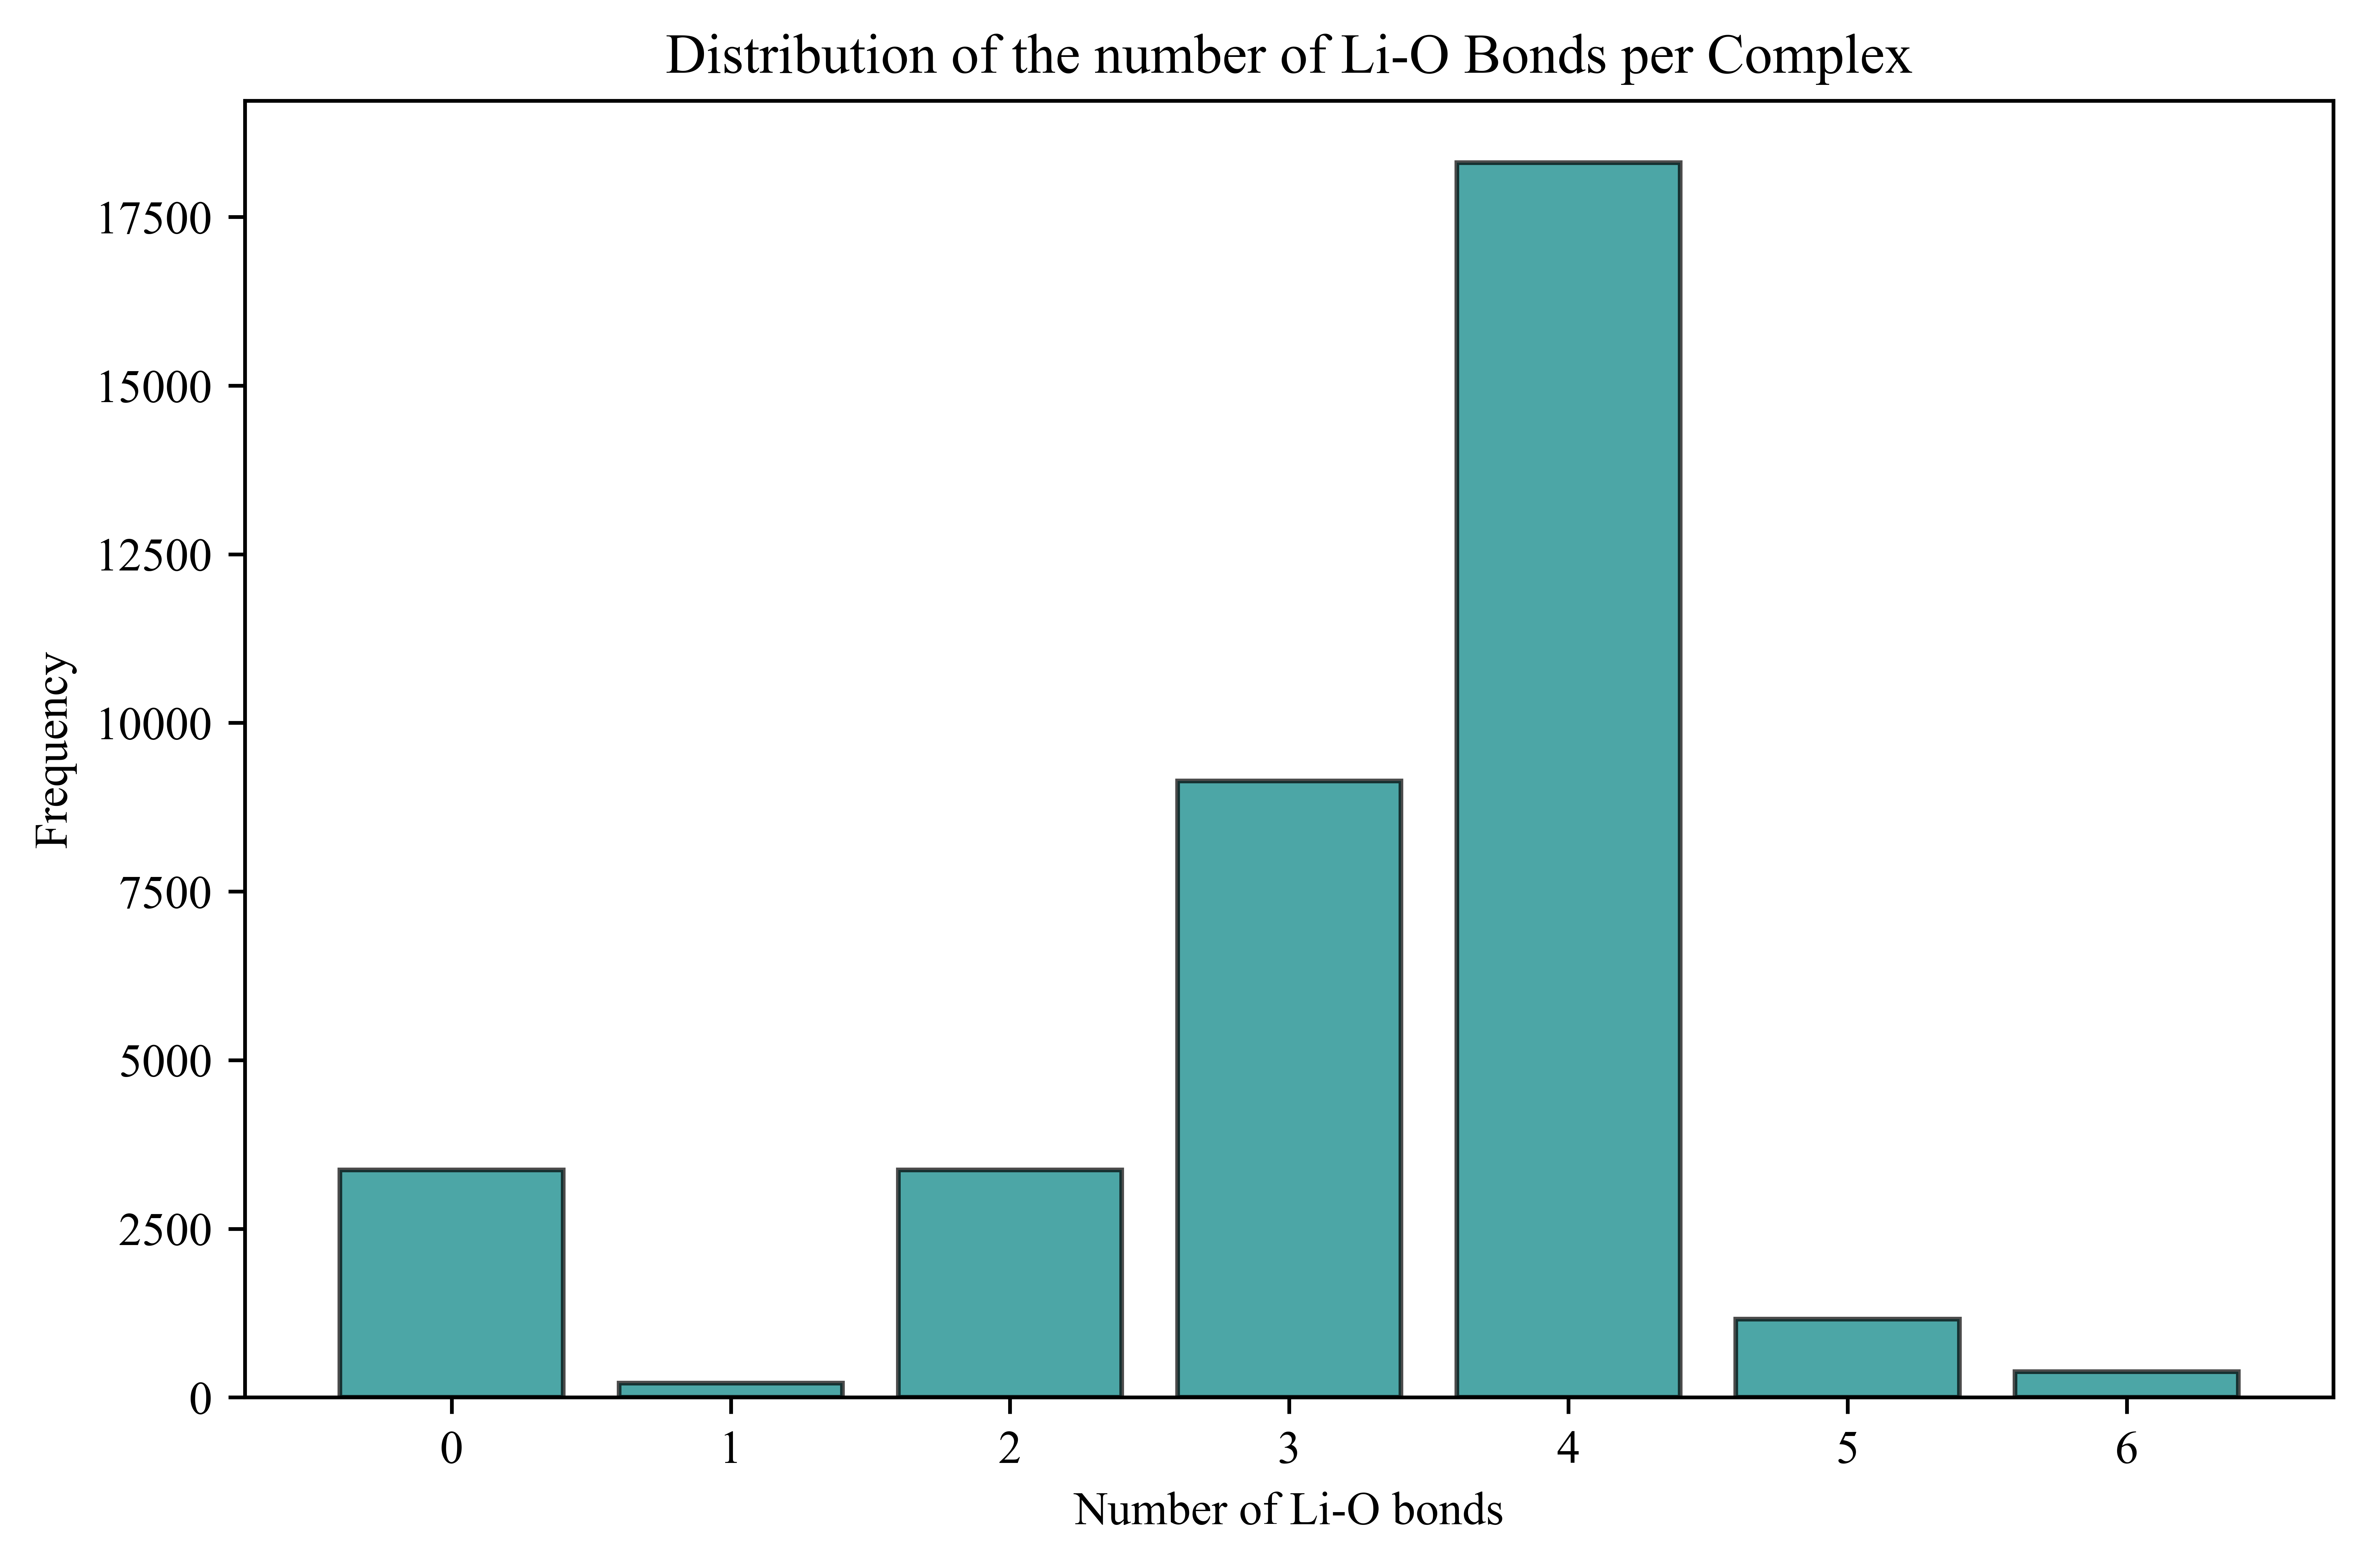

In [73]:
# Make bar chart showing numbers of different lithium co-ordination environments
df = df.dropna()
print(df)

df['bond number of best binding energy'] = pd.to_numeric(df['bond number of best binding energy'])

zero_bonds = df['bond number of best binding energy'].value_counts().get(0.0, 0)
one_bond =  df['bond number of best binding energy'].value_counts().get(1.0, 0)
two_bond =  df['bond number of best binding energy'].value_counts().get(2.0, 0)
three_bond =  df['bond number of best binding energy'].value_counts().get(3.0, 0)
four_bond =  df['bond number of best binding energy'].value_counts().get(4.0, 0)
five_bond =  df['bond number of best binding energy'].value_counts().get(5.0, 0)
six_bond =  df['bond number of best binding energy'].value_counts().get(6.0, 0)


print(f" {zero_bonds}\n {one_bond}\n {two_bond}\n {three_bond}\n {four_bond}\n {five_bond}\n {six_bond}")

# Define bond_numbers and values
bond_numbers = ['0', '1', '2', '3', '4', '5', '6']
values = [zero_bonds, one_bond, two_bond, three_bond, four_bond, five_bond, six_bond]

# Create bar chart
plt.figure(figsize=(8, 5), dpi=1000)  # DPI = dots per inch
plt.bar(bond_numbers, values, color='teal', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('Number of Li-O bonds')
plt.ylabel('Frequency')
plt.title('Distribution of the number of Li-O Bonds per Complex')
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/no_of_li_o_bond.png", dpi=1000, bbox_inches='tight')


# Show the plot
plt.show()


In [74]:
# Finding strongest bound complexes based on co-ordination environment
# Replace 0.0 with whatever co-ordination environment you're looking for
df = df.dropna()
filtered = df[df['bond number of best binding energy'] == 0.0]
min_score = filtered['best binding energy'].min()

# Get the row(s) with that min value
min_row = filtered[filtered['best binding energy'] == min_score]

print(min_row)


       Code  best binding energy  bond number of best binding energy
17977  DWEQ           -93.033062                                   0


C:\Users\sophi\AppData\Local\Temp\ipykernel_4632\1133215731.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bond number of best binding energy', y='best binding energy', data=avg_energy_bonds, palette='viridis', edgecolor='black')


   bond number of best binding energy  best binding energy
0                                   0           -14.156556
1                                   1           -18.218856
2                                   2           -14.125652
3                                   3           -12.666751
4                                   4           -11.194939
5                                   5           -10.120460
6                                   6           -10.658742


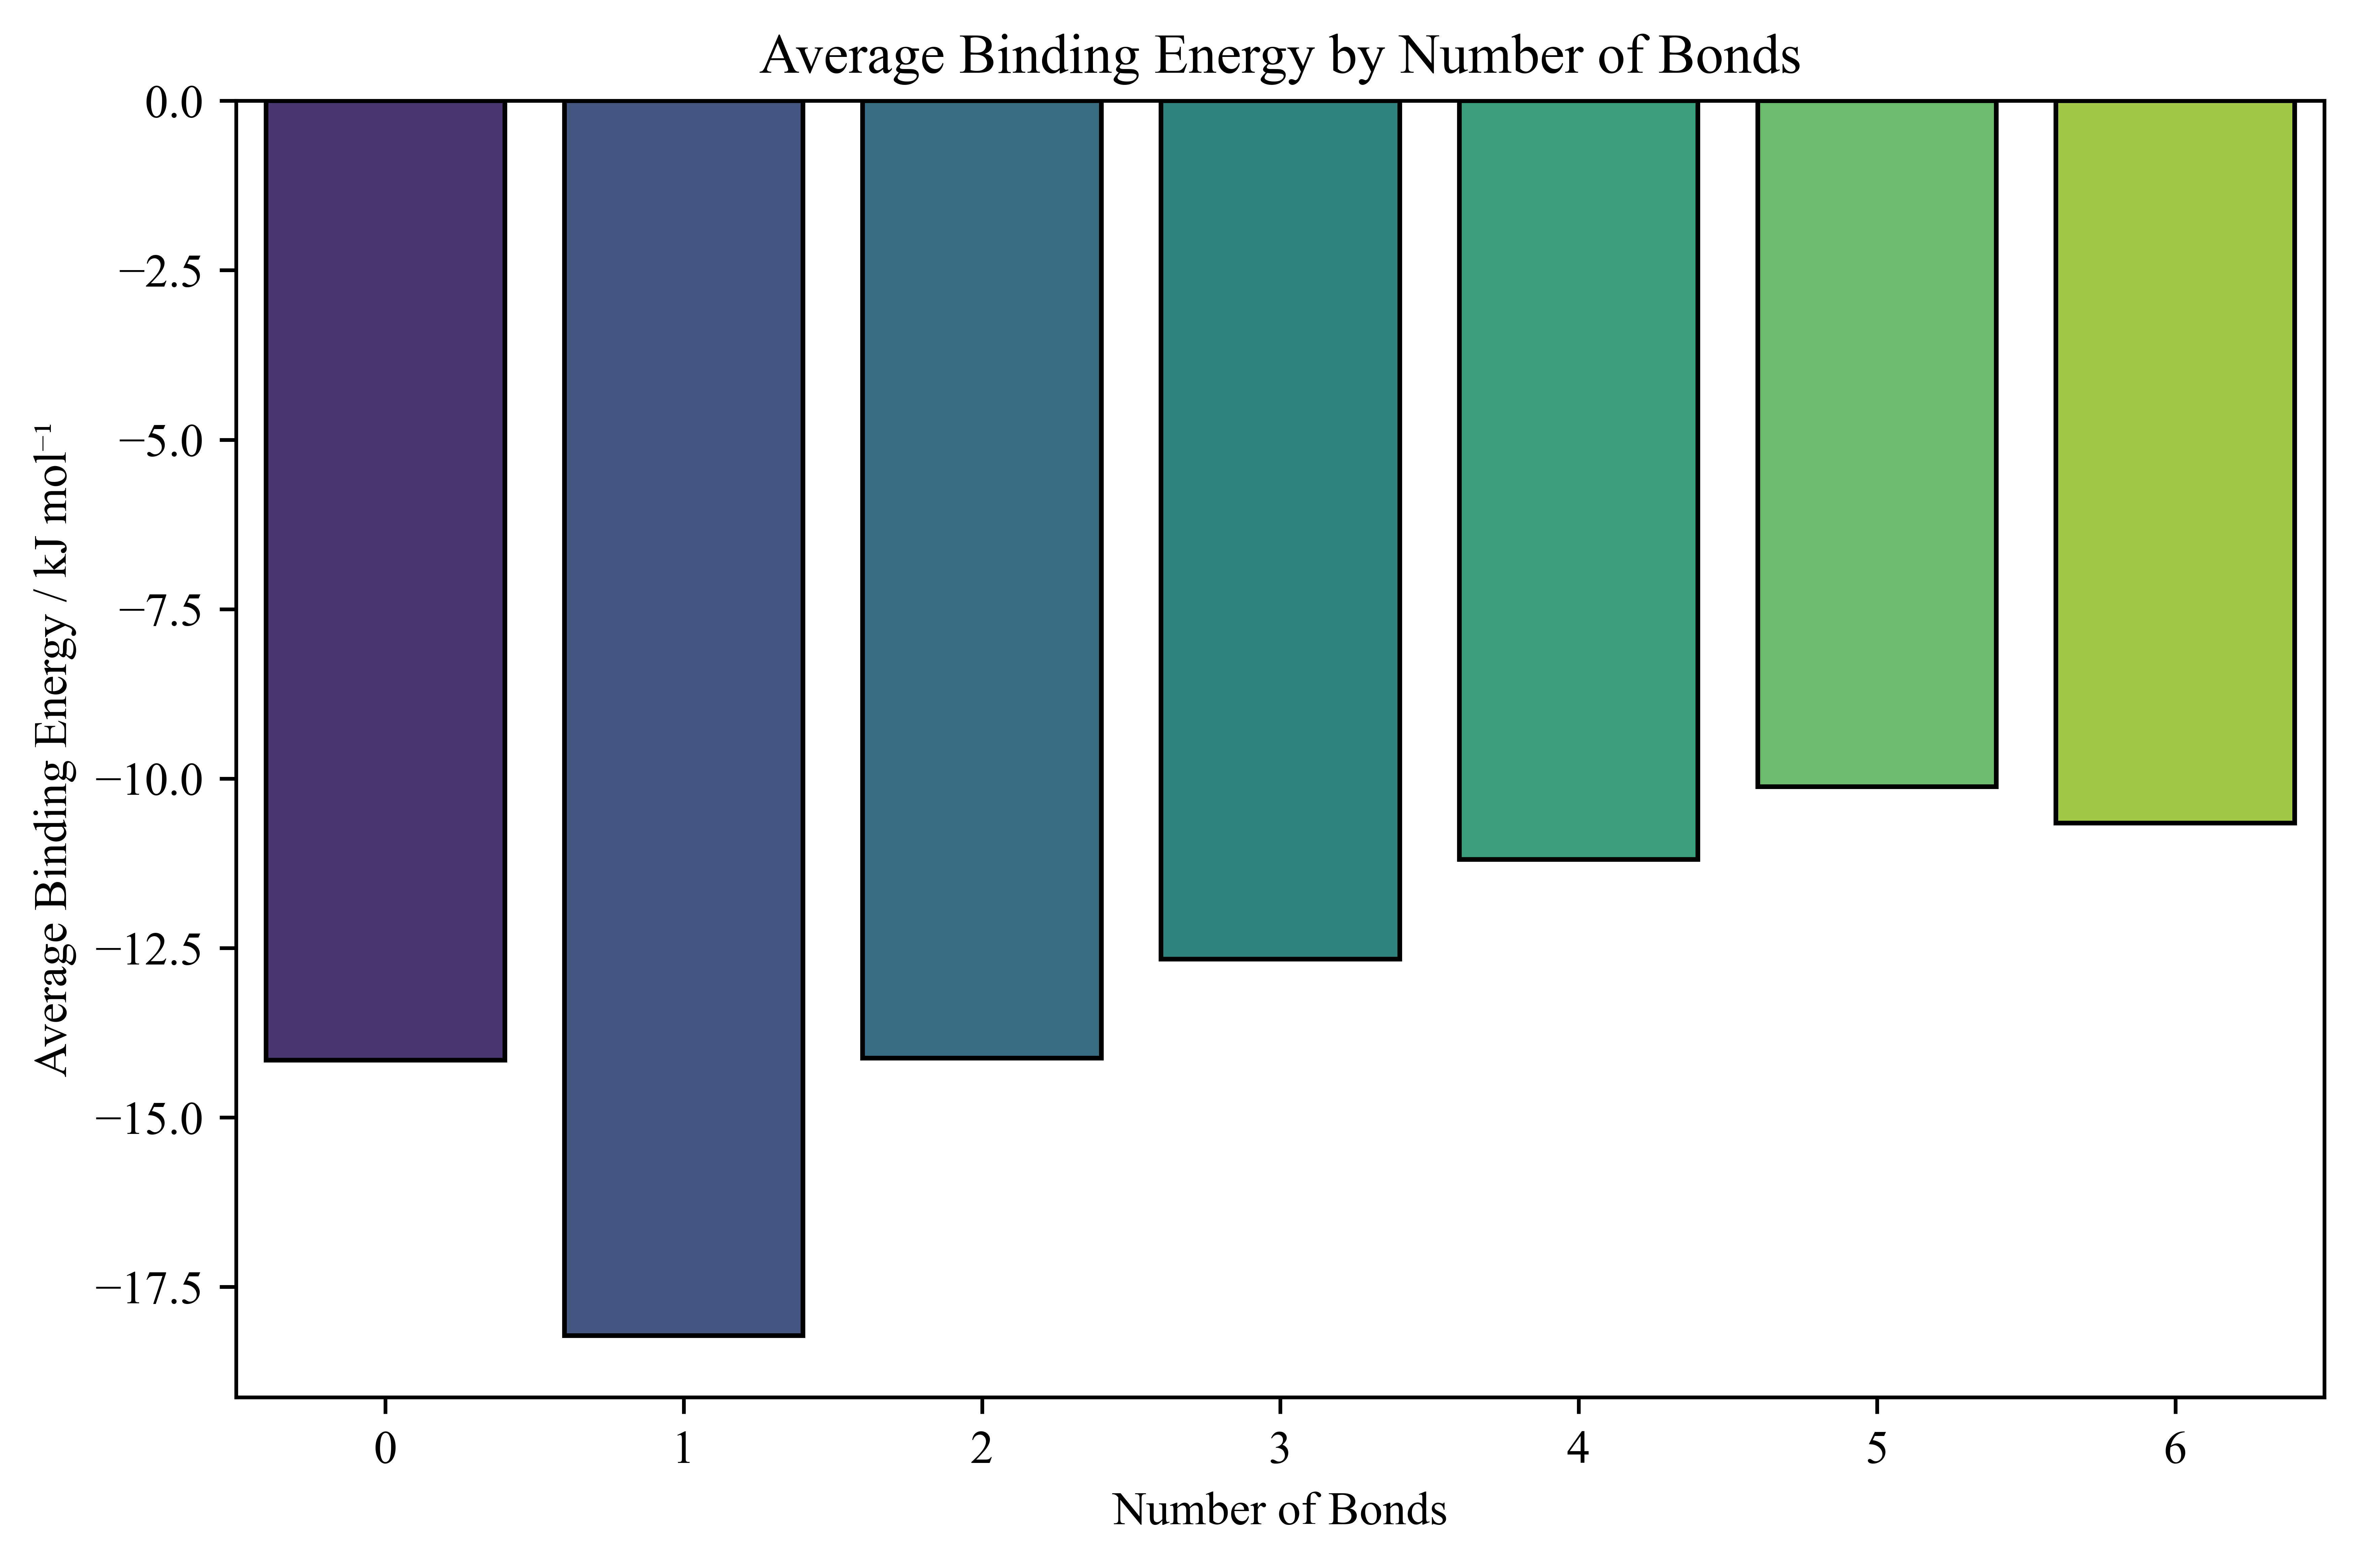

In [56]:
# Compute average binding energy per bond count
avg_energy_bonds = df.groupby('bond number of best binding energy')['best binding energy'].mean().reset_index()

avg_energy_bonds = avg_energy_bonds[avg_energy_bonds['bond number of best binding energy'] != 'No Match']
avg_energy_bonds['bond number of best binding energy'] = avg_energy_bonds['bond number of best binding energy'].astype(int)


# Plot bar chart
plt.figure(figsize=(8, 5), dpi=1000)
sns.barplot(x='bond number of best binding energy', y='best binding energy', data=avg_energy_bonds, palette='viridis', edgecolor='black')

# Labels and title
plt.xlabel("Number of Bonds")
plt.ylabel("Average Binding Energy / kJ mol⁻¹")
plt.title("Average Binding Energy by Number of Bonds")
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/average_binding_energy_per_no_of_bonds_histogram.png", dpi=1000, bbox_inches='tight')


print(avg_energy_bonds)

# Show plot
plt.show()

In [57]:
#DEMY
values = [88.89, 92.59, 98.00, 110.48, 121.43, 138.66]  
ideal = 109.5

# Convert to numpy array for convenience
values = np.array(values)

# Calculate deviations
deviations = values - ideal
mad = np.mean(np.abs(deviations))               # Mean Absolute Deviation
rmsd = np.sqrt(np.mean(deviations**2))          # Root Mean Square Deviation
max_dev = np.max(np.abs(deviations))            # Maximum Deviation

print('DEMY')
print(f"Mean Absolute Deviation: {mad:.4f}")
print(f"Root Mean Square Deviation: {rmsd:.4f}")
print(f"Maximum Deviation: {max_dev:.4f}")

# IEHE

values = [92.92, 98.54, 99.79, 104.86, 120.39, 135.04]  
ideal = 109.5

# Convert to numpy array for convenience
values = np.array(values)

# Calculate deviations
deviations = values - ideal
mad = np.mean(np.abs(deviations))               # Mean Absolute Deviation
rmsd = np.sqrt(np.mean(deviations**2))          # Root Mean Square Deviation
max_dev = np.max(np.abs(deviations))            # Maximum Deviation

print('IEHE')
print(f"Mean Absolute Deviation: {mad:.4f}")
print(f"Root Mean Square Deviation: {rmsd:.4f}")
print(f"Maximum Deviation: {max_dev:.4f}")

# DEWH

values = [98.28, 99.59, 102.04, 106.94, 117.52, 126.47]  
ideal = 109.5

# Convert to numpy array for convenience
values = np.array(values)

# Calculate deviations
deviations = values - ideal
mad = np.mean(np.abs(deviations))               # Mean Absolute Deviation
rmsd = np.sqrt(np.mean(deviations**2))          # Root Mean Square Deviation
max_dev = np.max(np.abs(deviations))            # Maximum Deviation

print('DEWH')
print(f"Mean Absolute Deviation: {mad:.4f}")
print(f"Root Mean Square Deviation: {rmsd:.4f}")
print(f"Maximum Deviation: {max_dev:.4f}")

# IEWD

values = [87.65, 98.13, 103.79, 107.03, 125.77, 136.62]  
ideal = 109.5

# Convert to numpy array for convenience
values = np.array(values)

# Calculate deviations
deviations = values - ideal
mad = np.mean(np.abs(deviations))               # Mean Absolute Deviation
rmsd = np.sqrt(np.mean(deviations**2))          # Root Mean Square Deviation
max_dev = np.max(np.abs(deviations))            # Maximum Deviation

print('IEWD')
print(f"Mean Absolute Deviation: {mad:.4f}")
print(f"Root Mean Square Deviation: {rmsd:.4f}")
print(f"Maximum Deviation: {max_dev:.4f}")

# EERQ

values = [94.52, 95.92, 96.22, 115.78, 123.56, 131.97]  
ideal = 109.5

# Convert to numpy array for convenience
values = np.array(values)

# Calculate deviations
deviations = values - ideal
mad = np.mean(np.abs(deviations))               # Mean Absolute Deviation
rmsd = np.sqrt(np.mean(deviations**2))          # Root Mean Square Deviation
max_dev = np.max(np.abs(deviations))            # Maximum Deviation

print('EERQ')
print(f"Mean Absolute Deviation: {mad:.4f}")
print(f"Root Mean Square Deviation: {rmsd:.4f}")
print(f"Maximum Deviation: {max_dev:.4f}")

DEMY
Mean Absolute Deviation: 15.1817
Root Mean Square Deviation: 17.4955
Maximum Deviation: 29.1600
IEHE
Mean Absolute Deviation: 13.0533
Root Mean Square Deviation: 14.6157
Maximum Deviation: 25.5400
DEWH
Mean Absolute Deviation: 9.3567
Root Mean Square Deviation: 10.3167
Maximum Deviation: 16.9700
IEWD
Mean Absolute Deviation: 14.1317
Root Mean Square Deviation: 16.5611
Maximum Deviation: 27.1200
EERQ
Mean Absolute Deviation: 14.1083
Root Mean Square Deviation: 14.8728
Maximum Deviation: 22.4700
